/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Medians [[2. 3. 2. 3. 1.]] [[ 5.  2.  2. 20.  1.]] [[ 2.  3.  2. 11.  1.]] [[ 2.  3.  2. 20.  1.]] [[5. 3. 2. 3. 1.]]


<Figure size 720x864 with 0 Axes>

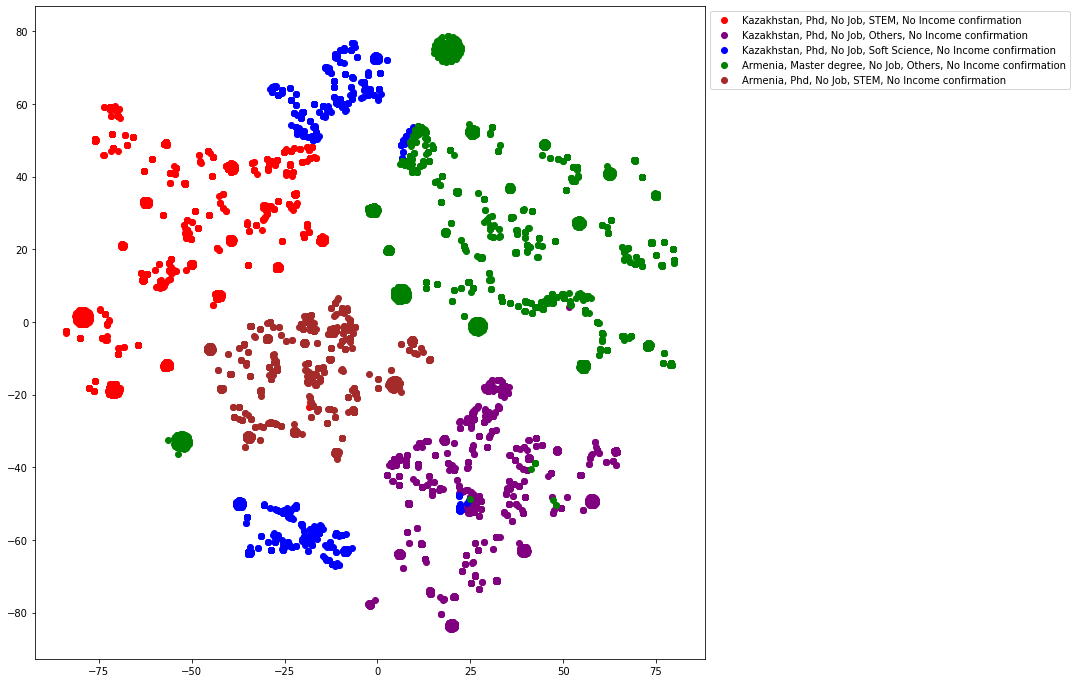

In [3]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/ISwifton/Clustering-of-sociological-data/main/Relocations.csv'
Real_rawdata=pd.read_csv(url)
Real=Real_rawdata.to_numpy()
dim = len(Real)
Real_final=np.zeros((dim,dim))

# Compute pairwise distance matrix (Job)
for i in range(dim):
  for j in range(dim):
   Real_final[i][j]=(sum(abs(Real[i]-Real[j])))

# Make clustering
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
Real_tsne = TSNE(n_components=2, random_state=0)
Real_kmns = KMeans(n_clusters=5).fit(Real_final)

Real_2d = Real_tsne.fit_transform(Real_final)
Real_y=Real_kmns.labels_

# Make medians for each cluster
num_cluster1 = 0
num_cluster2 = 1
num_cluster3 = 2
num_cluster4 = 3
num_cluster5 = 4

#print('Real_y', Real_y)

indexes1 = np.where(Real_y == 0)[0]
matrix_cluster1 = Real[[indexes1], :]
median1 = np.median(matrix_cluster1, axis=1)

indexes2 = np.where(Real_y == 1)[0]
matrix_cluster2 = Real[[indexes2], :]
median2 = np.median(matrix_cluster2, axis=1)

indexes3 = np.where(Real_y == 2)[0]
matrix_cluster3 = Real[[indexes3], :]
median3 = np.median(matrix_cluster3, axis=1)

indexes4 = np.where(Real_y == 3)[0]
matrix_cluster4 = Real[[indexes4], :]
median4 = np.median(matrix_cluster4, axis=1)

indexes5 = np.where(Real_y == 4)[0]
matrix_cluster5 = Real[[indexes5], :]
median5 = np.median(matrix_cluster5, axis=1)

print('Medians', median1, median2, median3, median4, median5)

#Real_rawdata.loc[:, "5"] = list(Real_y)
new_2d = np.append(Real_2d, Real_y[:,None],1)

Real_target_ids = range(len(Real_y))

from matplotlib import pyplot as plt
plt.figure(figsize=(10, 12))
colors = 'r', 'g', 'b', 'c', 'm'

lables = '0', '1', '2', '3', '4'
#print(new_2d[:,2])
#print(new_2d)

category_to_color = {0: 'red', 1: 'purple', 2:'blue', 3: 'green',  4: 'brown'}
category_to_label = {0: 'Kazakhstan, Phd, No Job, STEM, No Income confirmation', 1:'Kazakhstan, Phd, No Job, Others, No Income confirmation', 2:'Kazakhstan, Phd, No Job, Soft Science, No Income confirmation', 3:'Armenia, Master degree, No Job, Others, No Income confirmation',  4:'Armenia, Phd, No Job, STEM, No Income confirmation'}

# plot each category with a distinct label
fig, ax = plt.subplots(1,1, figsize=(12, 12))
for category, color in category_to_color.items():
    mask = new_2d[:, 2] == category
    ax.plot(new_2d[mask, 0], new_2d[mask, 1], 'o', 
            color=color, label=category_to_label[category])

ax.legend(loc="upper left", bbox_to_anchor=(1,1))